 # CS898BA Final Project_G233R756

### Binary Image Classification of Panda and Bear Dataset using Deep Learning Classifier

In [1]:
# Importing the neccessary packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2


In [2]:
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, Dropout, BatchNormalization
from tensorflow.keras import callbacks
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score


#### Data Preparation

The data will first need to be prepared. Load the training, validation, and test sets

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "C:\\Users\\Nusum's\\Downloads\\MSDS\\Sem4\\Image analysis\\Project\\archive (2)\\PandasBears\\Train"
validation_dir = "C:\\Users\\Nusum's\\Downloads\\MSDS\\Sem4\\Image analysis\\Project\\archive (2)\\PandasBears\\Valid"
test_dir = "C:\\Users\\Nusum's\\Downloads\\MSDS\\Sem4\\Image analysis\\Project\\archive (2)\\PandasBears\\Test"

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              target_size=(224, 224),
                                                              batch_size=32,
                                                              class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(224, 224),
                                                  batch_size=32,
                                                  class_mode='binary')


Found 500 images belonging to 2 classes.
Found 80 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


#### Let us look at some of the images from the dataset

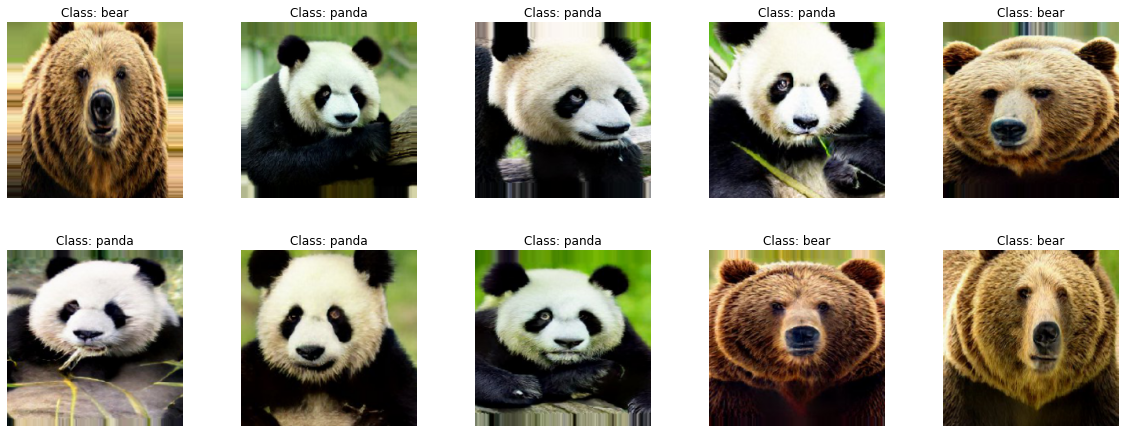

In [4]:
labels = ['bear', 'panda']

samples = train_generator.__next__()
images = samples[0]
target = samples[1]

plt.figure(figsize = (20,20))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.subplots_adjust(hspace=0.3,wspace=0.3)
    plt.imshow(images[i])
    plt.title(f"Class: {labels[int(target[i])]}")
    plt.axis('off')


#### Build and Train the Deep Learning Model

Using the training set, we will now construct and train the deep learning model. A pre-trained CNN architecture like VGG16 will be used, and it will then have some fully linked layers added to it. We will set the weights of the previously trained layers to zero and just train the most recent layers.


In [5]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.layers


#### Identifying the layers in the model

In [6]:
x = len(model.layers)
print(f'Our CNN has', x, 'layers')


Our CNN has 12 layers


#### Summary of the model

In [7]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

#### Compile the model

In [8]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#### Fit the model

In [15]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=len(train_generator),
                              epochs=10,
                              validation_data=validation_generator,
                              validation_steps=len(validation_generator))


C:\Users\Nusum's\AppData\Local\Temp\ipykernel_8124\873224740.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/10
16/16 [==============================] - 53s 3s/step - loss: 0.0148 - accuracy: 0.9960 - val_loss: 0.0075 - val_accuracy: 1.0000
Epoch 2/10
16/16 [==============================] - 51s 3s/step - loss: 0.0832 - accuracy: 0.9800 - val_loss: 3.0663e-04 - val_accuracy: 1.0000
Epoch 3/10
16/16 [==============================] - 49s 3s/step - loss: 0.0440 - accuracy: 0.9880 - val_loss: 2.7887e-04 - val_accuracy: 1.0000
Epoch 4/10
16/16 [==============================] - 51s 3s/step - loss: 0.0137 - accuracy: 0.9940 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 5/10
16/16 [==============================] - 50s 3s/step - loss: 0.0147 - accuracy: 0.9920 - val_loss: 1.4035e-04 - val_accuracy: 1.0000
Epoch 6/10
16/16 [==============================] - 49s 3s/step - loss: 3.6810e-04 - accuracy: 1.0000 - val_loss: 9.2654e-06 - val_accuracy: 1.0000
Epoch 7/10
16/16 [==============================] - 53s 3s/step - loss: 3.8188e-04 - accuracy: 1.0000 - val_loss: 1.1700e-05 - val_accuracy:

### Extract Features using Fully Connected Layer
Next, we will extract features from the validation set using one of the fully connected layers of the trained model.
We can extract features from the fully connected layers of the trained model for the validation and test sets using the predict() method. Let's extract features from the second last dense layer (512 units) for the validation and test sets.



In [16]:
# Extract features from validation set
model_layer = Sequential(model.layers[:-2])
train_features = model_layer.predict(train_generator)
valid_features = model_layer.predict(validation_generator)
test_features = model_layer.predict(test_generator)

1/1 [==============================] - 1s 619ms/step


#### We can use the extracted features from the fully connected layer to train a linear SVM using scikit-learn library.

We can train a linear SVM using scikit-learn library.





In [17]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1, random_state=42)
svm.fit(valid_features, validation_generator.classes)


SVC(C=1, kernel='linear', random_state=42)

from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1, random_state=42)
svm.fit(valid_features, validation_generator.classes)
#### We can evaluate the SVM model on the test set by extracting features from the test set using the same fully connected layer and then using the SVM to make predictions.
This will print a classification report that shows the precision, recall, and F1-score







In [18]:
from sklearn.metrics import classification_report

test_predictions = svm.predict(test_features)

print(classification_report(test_generator.classes, test_predictions))


              precision    recall  f1-score   support

           0       0.60      0.60      0.60        10
           1       0.60      0.60      0.60        10

    accuracy                           0.60        20
   macro avg       0.60      0.60      0.60        20
weighted avg       0.60      0.60      0.60        20



In [19]:
confusion_matrix(test_generator.classes, test_predictions)

array([[6, 4],
       [4, 6]], dtype=int64)

In [20]:
accuracy_score(test_generator.classes, test_predictions)

0.6